In [36]:
import pickle
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import pandas as pd

In [37]:
with open('./data/test.pkl', 'rb') as f:
    test_data = pickle.load(f)

In [38]:
test_data=np.array(test_data)
test_x=test_data[:,0]
test_y=test_data[:,1]


In [39]:
with open('./data/train.pkl', 'rb') as f2:
    train_data = pickle.load(f2)

In [40]:
train_data = np.array(train_data)
np.random.shuffle(train_data)
models = np.array_split(train_data, 10)
train_x=[]
train_y=[]
for model_num in range(10):
    train_x.append(models[model_num][:, 0])
    train_y.append(models[model_num][:, 1])
train_x =np.array(train_x)
train_y=np.array(train_y)
bias=[]
vari=[]
err=[]

In [41]:
# outputs
output=[]
#loop through degrees
for degree in range(1,21):
    # loop through models
    output.append([])
    for i in range(10):
        x_train = PolynomialFeatures(degree=degree).fit_transform(train_x[i].reshape(-1,1))
        x_test = PolynomialFeatures(degree=degree).fit_transform(test_x.reshape(-1,1))
        curr_model = LinearRegression().fit(x_train,train_y[i])
        output[degree-1].append(curr_model.predict(x_test))

In [51]:
def bias_var():
    global bias
    global vari
    global err
    bias=[]
    vari=[]
    err=[]
    for degree in range(1,21):
        output_curr_degree= output[degree-1]
        output_curr_degree=np.array(output_curr_degree)
        mean_point_over_10 = np.mean(output_curr_degree, axis = 0)
        bias.append(np.mean((mean_point_over_10 - test_y)**2))
        var_point_over_10 = np.var(output_curr_degree, axis = 0)
        vari.append(np.mean(var_point_over_10))
        err_a= np.array(output_curr_degree)-np.array(test_y)
        err_a=np.square(err_a)
        err_mean = np.mean(err_a, axis=0)
        err.append(np.mean(err_mean))
        
    table = pd.DataFrame({"Degree":np.array(range(1,21)),"Bias square": bias,"Variance": vari, "Error": err})
    print(table.to_string(index=False))
    return table
        
    
    
    

In [52]:
table = bias_var()

 Degree   Bias square       Variance         Error
      1  1.004039e+06   34154.179452  1.038193e+06
      2  9.556302e+05   65147.344285  1.020778e+06
      3  9.493713e+03   63580.125835  7.307384e+04
      4  9.910111e+03   92827.487461  1.027376e+05
      5  8.368208e+03  102125.076758  1.104933e+05
      6  7.426580e+03  123216.166131  1.306427e+05
      7  8.640023e+03  138336.653040  1.469767e+05
      8  9.070789e+03  163556.797382  1.726276e+05
      9  9.001263e+03  179643.029195  1.886443e+05
     10  9.295775e+03  191263.640488  2.005594e+05
     11  9.191673e+03  218736.412597  2.279281e+05
     12  1.868105e+04  205453.521027  2.241346e+05
     13  1.120533e+04  250682.837990  2.618882e+05
     14  2.797755e+04  212454.190374  2.404317e+05
     15  5.205774e+04  236155.982013  2.882137e+05
     16  5.728797e+04  225262.412013  2.825504e+05
     17  1.025964e+05  251240.058485  3.538365e+05
     18  1.082427e+05  244236.870407  3.524795e+05
     19  1.783607e+05  274580.6

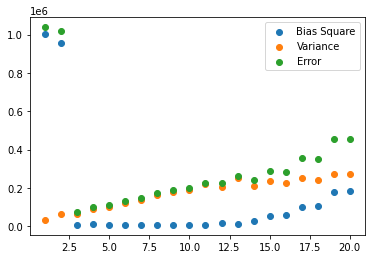

In [53]:
import matplotlib.pyplot as plt
plt.scatter(np.array(range(1,21)),table["Bias square"].tolist(),label="Bias Square")
plt.scatter(np.array(range(1,21)),table["Variance"].tolist(),label="Variance")
plt.scatter(np.array(range(1,21)),table["Error"].tolist(), label="Error")
plt.legend()
plt.show()